# 1. Introduction



### Objective

Project ini bertujuan untuk membuat model Machine Learning yang dapat untuk memprediksi harga properti di Melbourne, Australia dengan menggunakan data historis penjualan di tahun 2016.

### Latar Belakang

Properti merupakan salah satu bidang yang paling berpengaruh dalam kehidupan manusia. Kita menggunakan properti untuk berbagai kebutuhan, seperti tempat tinggal, tempat berusaha, pembuatan fasilitas umum, dan lain sebagainya. Setiap properti memiliki nilai jual yang bergantung pada fungsi bangunan, luas tanah dan bangunan, lokasi, fasilitas yang tersedia, infrastruktur sekitar lokasi, dan sebagainya. Dengan banyaknya kriteria tersebut, para pembeli / investor, saya mendapat permintaan untuk membuat sebuah metode untuk melakukan prediksi harga properti / bangunan di Melbourne, Australia untuk dapat digunakan oleh User dari seluruh kalangan, baik untuk masyarakat umum, agen Real Estate, ataupun pihak lainnya seperti investor dan developer properti. Data yang digunakan adalah data asli mengenai harga properti di Melbourne, Australia pada tahun 2016.

### Website

Machine Learning dapat diakses pada website https://huggingface.co/spaces/nathanzefanya/melbourne-housing-snapshot-dataset

### Sumber Dataset

Dataset diambil dari https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot mengenai harga properti di Melbourne, Australia pada tahun 2016.

# 2. Import Libraries

In [151]:
# Import library untuk pengolahan dan manipulasi data
import pandas as pd
import numpy as np
from scipy import stats

# Import library visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library feature engineering dan preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer

# Import library evaluasi model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

# Import library model regresi
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import library untuk korelasi Phi-K
import phik

# Import library untuk menyimpan model, scaler, dan encoder
import joblib
import pickle
import json

# Import untuk menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed 
np.random.seed(5)

# 3. Data Loading

Dalam project kali ini, kita akan menggunakan dataset harga properti di Melbourne, Australia pada tahun 2016.

In [83]:
# Melakukan loading dataset
df_ori = pd.read_csv('P1M2_nathanael.csv')

# Menampilkan dataset
df_ori

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [84]:
# Menampilkan 10 data teratas
df_ori.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [85]:
# Menampilkan 10 data terbawah
df_ori.tail(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,674.0,NaN,NaN,NaN,-37.88360,145.22805,Eastern Metropolitan,7082.0
13571,Wantirna South,15 Mara Cl,4,h,1330000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,717.0,191.0,1980.0,NaN,-37.86887,145.22116,Eastern Metropolitan,7082.0
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,NaN,-37.70657,145.07878,Northern Metropolitan,2329.0
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


Dataset tersebut akan kita duplikasi untuk menjaga data asli dari perubahan yang tidak disengaja.

In [86]:
# Melakukan duplikasi dataset
df = df_ori.copy()

Selanjutnya, kita akan melakukan pengecekan data duplikasi.

In [87]:
# Menampilkan jumlah data duplikasi
df.duplicated().sum()

0

Tidak terdapat data yang terduplikasi pada dataset tersebut. Selanjutnya, kita akan melakukan pengecekan terhadap jumlah kolom, baris, serta tipe data masing-masing kolom.

In [88]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Dari informasi tersebut, terdapat 21 kolom dan 13580 baris, di mana terdapat 1 kolom dengan tipe data integer, 12 kolom dengan tipe data float, serta 8 kolom dengan tipe data object. Berikut adalah penjelasan dari setiap kolom:

| Column Name     | Description                                                                                                           |
|------------------|-----------------------------------------------------------------------------------------------------------------------|
| `Suburb`         | Nama wilayah atau lokasi                                                                |
| `Address`        | Alamat lengkap                                                                                             |
| `Rooms`          | Jumlah ruangan                                                                                       |
| `Type`           | Jenis properti: h = house/cottage/villa/semi/terrace, u = unit/duplex, t = townhouse, dev site = development site, o-res = other residential |
| `Price`          | Harga properti dalam dolar Australia (AUD)                                                                           |
| `Method`         | Metode penjualan properti: S = terjual, SP = terjual sebelum lelang, PI = gagal terjual, PN/SN = harga tidak diumumkan, NB/VB = tidak ada penawaran/vendor bid, W = ditarik sebelum lelang, SA/SS = terjual setelah lelang |
| `SellerG`        | Nama agen real estat / agen penjual                                                                          |
| `Date`           | Tanggal penjualan properti                                                                    |
| `Distance`       | Jarak properti dari Central Business District (CBD) Melbourne dalam satuan kilometer                                       |
| `Postcode`       | Kode pos                                                                                            |
| `Bedroom2`       | Jumlah kamar tidur (dari sumber alternatif)                                                                 |
| `Bathroom`       | Jumlah kamar mandi                                                                                                   |
| `Car`            | Jumlah tempat parkir mobil                                                                                           |
| `Landsize`       | Luas tanah properti dalam meter persegi (m2)                                                                          |
| `BuildingArea`   | Luas bangunan properti dalam meter persegi (m2)                                                                          |
| `YearBuilt`      | Tahun properti dibangun                                                                                              |
| `CouncilArea`    | Nama otoritas pemerintahan lokal                                                      |
| `Lattitude`      | Koordinat lintang lokasi properti                                                                                    |
| `Longtitude`     | Koordinat bujur lokasi properti                                                                                      |
| `Regionname`     | Wilayah geografis umum                                                |
| `Propertycount`  | Jumlah total properti yang terdapat di suburb / wilayah tersebut  

Selanjutnya, kita akan melihat data analisis statistik dataset tersebut.

In [89]:
# Menampilkan statistik dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


Untuk memudahkan analisis, nama kolom akan disesuaikan.

In [90]:
# Menyesuaikan nama kolom dengan huruf kecil

df.columns = df.columns.str.lower()

# Menampilkan nama kolom
df.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

Kemudian, kita akan merubah nama kolom `car` menjadi `carports` karena data yang tersedia merupakan jumlah carports, bukan jumlah mobil. Kita juga akan memisahkan nama kolom dengan garis bawah agar lebih mudah dibaca.



In [91]:
# Merubah nama kolom
df.rename(columns={
    'sellerg': 'agent_name',
    'bedroom2': 'bedroom',
    'car': 'carport',
    'landsize': 'land_size',
    'buildingarea': 'building_area',
    'yearbuilt': 'year_built',
    'councilarea': 'council_area',
    'regionname': 'region_name',
    'longtitude': 'longitude',
    'propertycount': 'property_count'
}, inplace=True)

# Menampilkan nama kolom
df.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'agent_name',
       'date', 'distance', 'postcode', 'bedroom', 'bathroom', 'carport',
       'land_size', 'building_area', 'year_built', 'council_area', 'lattitude',
       'longitude', 'region_name', 'property_count'],
      dtype='object')

Setelah merapikan kolom, kita akan melakukan Exploratory Data Analysis.

# 4. Exploratory Data Analysis

Pada bagian ini, kita akan melakukan beberapa analisis untuk mengetahui tipe dan distribusi data yang akan digunakan.

### 4.1. Distribusi Harga Properti

Kita akan melihat distribusi harga properti di Melbourne, Australia.

In [92]:
# Menampilkan distribusi data kolom harga
df['price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: price, dtype: float64

Kemudian, kita akan melakukan pengecekan skewness dari data tersebut.

In [93]:
# Menghitung skew
skew = df['price'].skew()
print(f"Skewness harga properti: {skew:.2f}")

Skewness harga properti: 2.24


Dari hasil perhitungan tersebut, diketahui bahwa skewness dari data tersebut adalah 2.24. Selanjutnya, kita akan mencoba melakukan visualisasi data dalam grafik.

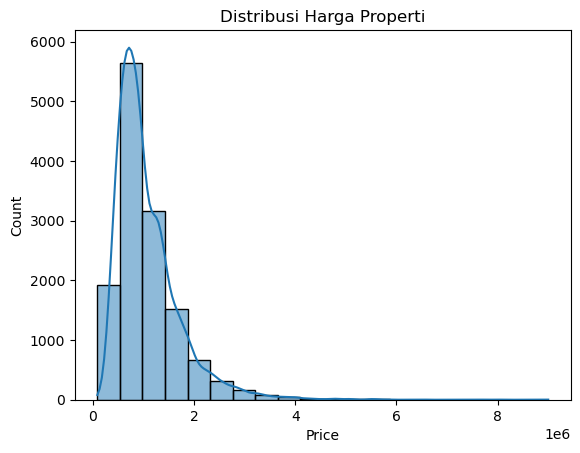

In [94]:
# Menampilkan visualisasi distribusi harga properti

sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribusi Harga Properti')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Berdasarkan distribusi data dan hasil visualisasinya, kita mendapatkan informasi sebagai berikut:
1. Dari hasil perhitungan skewness dan grafik yang tersedia, terlihat bahwa distribusi data positif ke kanan. Hal tersebut berarti sebagian besar harga properti yang dijual relatif rendah.
2. Harga penjualan properti termahal adalah seharga $9.000.000 AUD . Penjualan ini dapat disebabkan oleh luas bangunan atau daerah tempat bangunan tersebut berada.
3. Mayoritas properti yang terjual pada rentang harga $500.000 - $1.000.000 AUD.

### 4.2. Perbandingan Jumlah dan Harga Berdasarkan Jenis Properti

Selanjutnya, kita akan melakukan analisis harga berdasarkan jenis bangunan yang terjual. Kita akan melihat apa saja jenis properti yang tersedia dalam data.

In [95]:
# Melihat jenis properti pada data
df['type'].unique()

array(['h', 'u', 't'], dtype=object)

Pada dataset, terdapat tiga jenis properti yang dijual, yaitu:
1. h = house/cottage/villa/semi/terrace 
2. u = unit/duplex
3. t = townhouse

Kemudian kita akan menghitung jumlah masing-masing tipe properrti yang telah terjual.

In [96]:
# Menghitung jumlah properti per tipe
df['type'].value_counts()

type
h    9449
u    3017
t    1114
Name: count, dtype: int64

Kemudian kita akan melakukan perhitungan rata-rata harga per tipe properti. 

In [97]:
# Menghitung rata-rata harga per tipe properti
avg_price_per_type = df.groupby('type')['price'].mean().reset_index()

# Menampilkan hasil
print(avg_price_per_type)

  type         price
0    h  1.242665e+06
1    t  9.337351e+05
2    u  6.051275e+05


Selanjutnya kita akan melakukan perbandingan harga dan jumlah ketiga jenis properti tersebut dalam bentuk grafik.

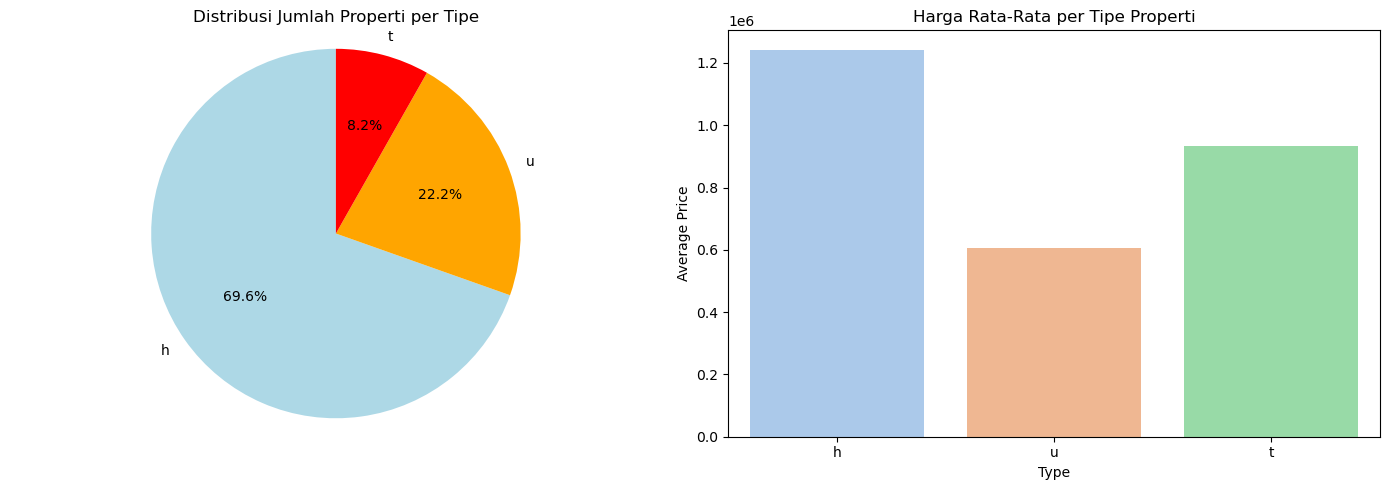

In [98]:
# Membuat 2 jenis grafik dengan subplot 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Menentukan urutan tipe
type_order = ['h', 'u', 't']

# Menentukan variabel jumlah tipe
counts = df['type'].value_counts().reindex(type_order)

# Membuat piechart jumlah properti per tipe
axes[0].pie(
    counts, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    colors=["lightblue", "orange", "red"], 
    startangle=90
)
axes[0].set_title('Distribusi Jumlah Properti per Tipe')
axes[0].axis('equal')

# Membuat grafik histogram harga rata-rata per tipe
avg_price = df.groupby('type')['price'].mean().reset_index()
sns.barplot(data=avg_price, x='type', y='price', order=type_order, palette='pastel', ax=axes[1])
axes[1].set_title('Harga Rata-Rata per Tipe Properti')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Average Price')

# Tampilkan kedua plot
plt.tight_layout()
plt.show()

Dari seluruh grafik dan data di atas, kita mendapatkan informasi sebagai berikut:
1. Properti yang paling banyak terjual adalah tipe 'h' dengan jumlah bangunan yang terjual adalah 9449 unit. Jumlah tersebut merupakan 69.6% dari total properti yang terjual. Sementara itu, properti dengan tipe 'u' terjual sebanyak 3017 unit atau sekitar 22,2% dari total penjualan properti, sedangkan penjualan properti terendah adalah tipe 't' adalah 1114 unit atau sekitar 8.2% dari keseluruhan properti yang terjual. 
2. Properti dengan tipe 'h' adalah properti dengan harga jual rata-rata tertinggi dibanding tipe lainnya, yaitu pada angka $1,242,665 AUD. Walaupun tipe 't' memiliki penjualan unit terendah, namun harga rata-rata penjualannya masih lebih tinggi dibanding tipe 'u', yaitu $933,735 AUD untuk tipe 't' dan $605,117 untuk tipe 'u'.


### 4.3. Metode Penjualan Properti

Pada bagian ini, kita akan melakukan analisis mengenai jenis metode penjualan properti pada setiap tipe.

In [99]:
# Jenis metode penjualan pada data
df['method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

Metode penjualan yang tersedia pada dataset antara lain:

S   = terjual 

SP  = terjual sebelum lelang 

PI  = gagal terjual

VB  = vendor bid 

SA  = terjual setelah lelang

In [100]:
# Menghitung jumlah penjualan per metode
df['method'].value_counts()

method
S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: count, dtype: int64

Selanjutnya kita akan membuat visualisasi data penjualan properti berdasarkan metode penjualannya.

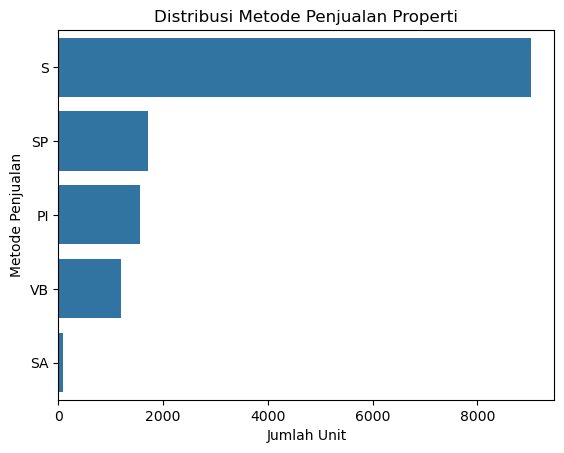

In [101]:
# Membuat visualisasi distribusi data sesuai metode penjualan dengan grafik
sns.countplot(y='method', data=df)
plt.title('Distribusi Metode Penjualan Properti')
plt.xlabel('Jumlah Unit')
plt.ylabel('Metode Penjualan')
plt.show()

Dari grafik dan data di atas, kita mendapatkan informasi sebagai berikut:
1. Pada data yang digunakan, mayoritas properti (S) telah terjual dengan jumlah 9022 unit. Selain itu, terdapat 1703 unit properti yang terjual tanpa lelang dan 92 unit yang terjual setelah lelang.
2. Terdapat properti yang belum terjual, di antaranya terdiri dari 1564 unit yang belum terjual (PI) dan 1199 unit yang telah dilakukan penawaran oleh penjual (VB).


### 4.4. Harga Properti Per Wilayah

Pada bagian ini, kita akan melakukan analisis terhadap harga properti berdasarkan wilayah yang diambil dari kolom  `region_name`.

In [102]:
# Melihat daftar region pada data
df['region_name'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

Terdapat 8 wilayah penjualan properti yang akan kita hitung rata-rata penjualan per wilayahnya.

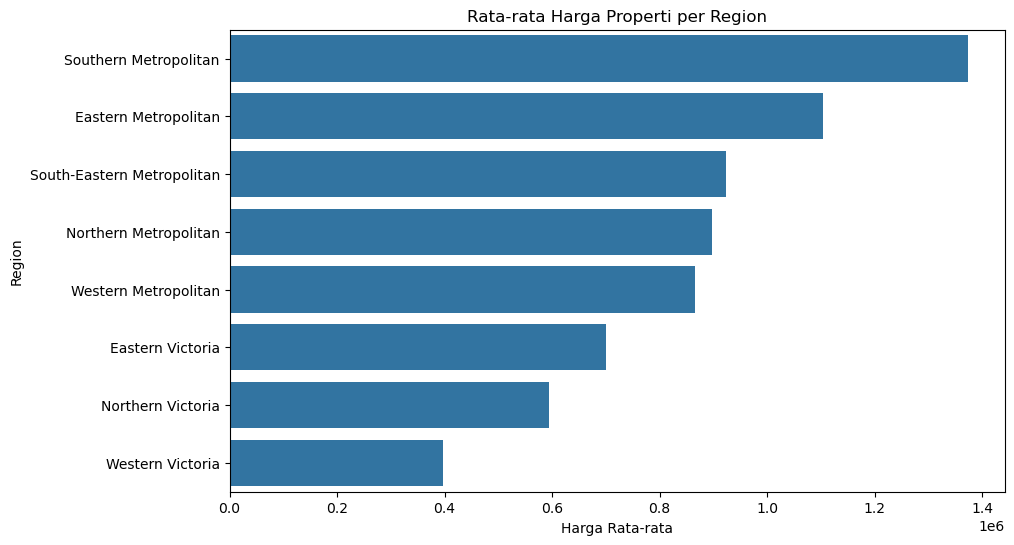

                  region_name         price
1       Southern Metropolitan  1.372963e+06
2        Eastern Metropolitan  1.104080e+06
3  South-Eastern Metropolitan  9.229438e+05


In [103]:
# Membuat variabel rata-rata harga per region
avg_region_price = df.groupby('region_name')['price'].mean().sort_values(ascending=False)

# Membuat visualisasi data
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_region_price.values, y=avg_region_price.index)
plt.title('Rata-rata Harga Properti per Region')
plt.xlabel('Harga Rata-rata')
plt.ylabel('Region')
plt.show()

# Menghitung rata-rata harga per region
avg_price_per_region = df.groupby('region_name')['price'].mean().reset_index()

# Membuat variabel untuk mengambil top 3 region dengan harga tertinggi
top3_region = avg_price_per_region.sort_values(by='price', ascending=False).head(3).reset_index(drop=True)

# Reset index
top3_region.index = top3_region.index + 1

# Menampilkan hasil
print(top3_region)

Dari grafik tersebut, kita mendapatkan informasi sebagai berikut:
1. Wilayah geografis dengan rata-rata harga unit properti termahal adalah Southern Metropolitan dengan rata-rata harga unitnya sebesar $1.372.963 AUD, diikuti oleh Eastern Metropolitan dan South-Eastern Metropolitan dengan masing-masing rata-rata harga sebesar $1.104.080 AUD dan $922.944 AUD.
2. Wilayah geografis dengan rata-rata harga unit properti termurah berada pada Western Victoria, yaitu sekitar $400.000 AUD per unit

### 4.5. Pengaruh Jumlah Ruangan terhadap Harga Properti

Pada bagian ini, kita akan melihat pengaruh banyaknya jumlah ruangan terhadap harga properti.

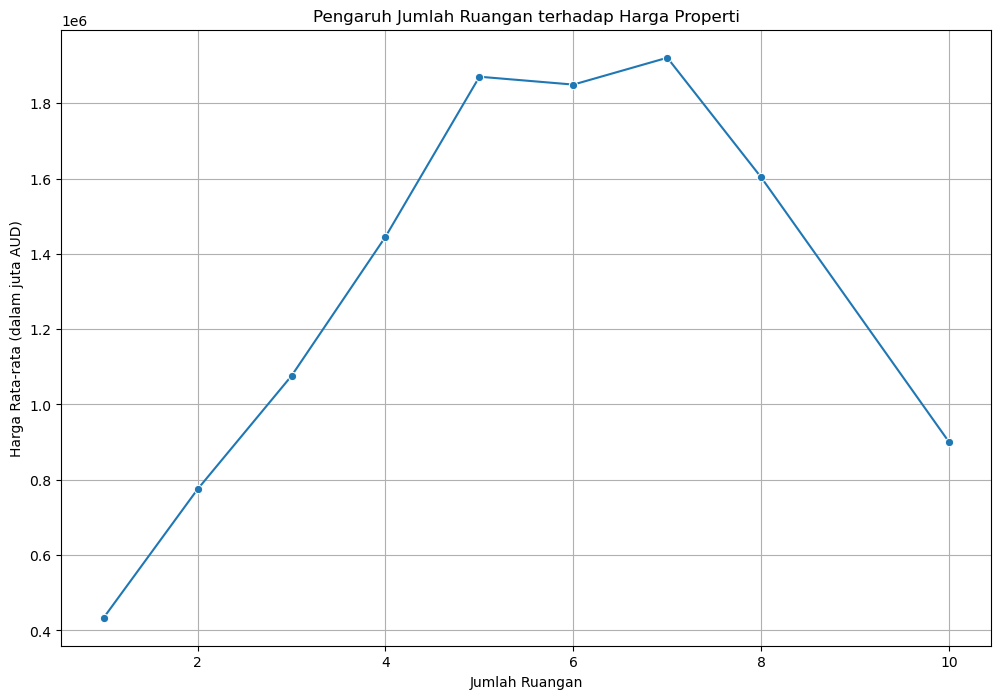

In [104]:
# Menghitung  rata-rata harga per jumlah kamar (kolom 'room')
avg_price_by_room = df.groupby('rooms')['price'].mean().reset_index()

# Urutkan berdasarkan jumlah kamar supaya garis plot rapi
avg_price_by_room = avg_price_by_room.sort_values('rooms')

# Plot line plot
plt.figure(figsize=(12,8))
sns.lineplot(data=avg_price_by_room, x='rooms', y='price', marker='o')
plt.title('Pengaruh Jumlah Ruangan terhadap Harga Properti')
plt.xlabel('Jumlah Ruangan')
plt.ylabel('Harga Rata-rata (dalam juta AUD)')
plt.grid(True)
plt.show()

Dari grafik tersebut, kita mendapat informasi sebagai berikut:
1. Semakin banyak ruangan yang dimiliki sebuah unit properti, tidak menjamin kenaikan harga jual unit tersebut. Rata-rata penjualan tertinggi berada pada unit properti yang terdiri dari 7 ruangan. 
2. Jumlah ruangan terbanyak adalah 10 ruangan dalam 1 unit properti. Namun, rata-rata harga nya cenderung rendah dibandingkan dengan unit properti dengan jumlah ruangan 3-9.

# 5. Feature Engineering

Pada bagian ini, kita akan menganalisis setiap fitur yang dianggap relevan pada dataset untuk membuat model prediksi yang sesuai dengan tujuan project ini. Kita akan melakukan pengecekan dahulu terhadap dataset yang akan kita gunakan.

In [105]:
# Menampilkan dataset
df.head(10)

,suburb,address,rooms,type,price,method,agent_name,date,distance,postcode,...,bathroom,carport,land_size,building_area,year_built,council_area,lattitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


Kita akan memulai analisis dengan membagi data menjadi train dan test terlebih dahulu.

### 5.1. Split Data Fitur and Target

Kita akan menjadikan kolom `price` sebagai target dan kolom lainnya sebagai fitur.

In [106]:
# Melakukan pemisahan X sebagai fitur dan y sebagai target
X = df.drop(['price'],axis=1)
y = df.price

# Menampilkan data y
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: price, Length: 13580, dtype: float64

In [107]:
# Menampilkan data X
X

,suburb,address,rooms,type,method,agent_name,date,distance,postcode,bedroom,bathroom,carport,land_size,building_area,year_built,council_area,lattitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


Selanjutnya, kita akan melakukan pengelompokan data dengan jenis kolom numerikal dan kategorikal.

### 5.2. Split Numerical and Categorical Columns

In [108]:
# Menampilkan seluruh kolom pada fitur X
X.columns

Index(['suburb', 'address', 'rooms', 'type', 'method', 'agent_name', 'date',
       'distance', 'postcode', 'bedroom', 'bathroom', 'carport', 'land_size',
       'building_area', 'year_built', 'council_area', 'lattitude', 'longitude',
       'region_name', 'property_count'],
      dtype='object')

Selanjutnya, kita akan menyisihkan kolom yang dirasa tidak berpengaruh untuk melakukan prediksi. Pengolahan pada kolom `date` akan dilakukan pada tahap-tahap berikutnya.

In [109]:
# Melakukan drop kolom
X = X.drop(columns=['address', 'agent_name', 'postcode', 'council_area', 'lattitude', 'longitude'])

# Menampilkan kembali seluruh kolom pada fitur X
X.columns

Index(['suburb', 'rooms', 'type', 'method', 'date', 'distance', 'bedroom',
       'bathroom', 'carport', 'land_size', 'building_area', 'year_built',
       'region_name', 'property_count'],
      dtype='object')

In [110]:
# Membuat kelompok kolom numerikal
num_cols = ['rooms','distance', 'bedroom',
            'bathroom', 'carport', 'land_size',
            'building_area', 'year_built', 'property_count' ]

# Membuat kelompok kolom kategorikal
cat_cols =['suburb', 'type', 
           'method', 'region_name']

Selanjutnya, kita akan melakukan Cardinality Check untuk kolom categorikal.

### 5.3. Cardinality Check

In [111]:
# Membuat looping kolom kategorikal untuk melihat masing-masing jumlah unique value 
for col in cat_cols:
    print(f"Kolom: {col}, Jumlah unique value: {X[col].nunique()}")

Kolom: suburb, Jumlah unique value: 314
Kolom: type, Jumlah unique value: 3
Kolom: method, Jumlah unique value: 5
Kolom: region_name, Jumlah unique value: 8


Dari informasi tersebut, kolom suburb dapat dikategorikan sebagai high cardinality, sedangkan kolom lainnya bisa diasumsikan sudah memiliki low cardinality. Kita akan melakukan encoding untuk kolom `suburb`.

In [112]:
# Menampilkan unique value dari kolom suburb
X['suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

Untuk menurunkan cardinality dari kolom `suburb`, kita akan melakukan frequency encoding.

In [113]:
# Hitung frekuensi kemunculan setiap suburb
freq_encoding = X['suburb'].value_counts()

# Mapping ke dataframe
X['suburb_freq'] = X['suburb'].map(freq_encoding)

# Menyisihkan kolom suburb
X = X.drop(columns=['suburb'])

# Memasukkan kolom baru ke dalam kolom numerikal
num_cols.append('suburb_freq')

Setelah melakukan cardinality check, kita akan melakukan pemisahan data X menjadi train dan test.

### 5.4. Split Data Train and Test

In [114]:
# Pemisahan data train dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (10864, 14)
Test Size:  (2716, 14)


Setelah melakukan pemisahan Data Train dan Test, kita akan melakukan handling missing value.

### 5.5 Handling Missing Value


In [115]:
# Melakukan pengecekan missing value pada X train
X_train.isnull().sum()

rooms                0
type                 0
method               0
date                 0
distance             0
bedroom              0
bathroom             0
carport             55
land_size            0
building_area     5153
year_built        4315
region_name          0
property_count       0
suburb_freq          0
dtype: int64

In [116]:
# Melakukan pengecekan missing value pada X train
X_test.isnull().sum()

rooms                0
type                 0
method               0
date                 0
distance             0
bedroom              0
bathroom             0
carport              7
land_size            0
building_area     1297
year_built        1060
region_name          0
property_count       0
suburb_freq          0
dtype: int64

In [117]:
# Melakukan pengecekan missing value pada X train
y_train.isnull().sum()

0

In [118]:
# Melakukan pengecekan missing value pada X train
y_test.isnull().sum()

0

Terdapat missing value pada kolom `carport`, `building_area`, dan `year_built` pada data X train dan test. Kita akan melakukan pengecekan jenis missing value pada ketiga kolom tersebut untuk mengetahui jenis handling missing value yang dapat dilakukan.

In [119]:
# Melihat distribusi data kolom X train yang terdapat missing value
stats= X_train[['carport', 'building_area', 'year_built']].describe().T

# Menambahkan kolom skewness
stats['skewness'] = X_train[['carport', 'building_area', 'year_built']].skew()

# Menampilkan hasil
print(stats)

                 count         mean         std     min     25%     50%  \
carport        10809.0     1.611527    0.953188     0.0     1.0     2.0   
building_area   5711.0   146.991288  132.056358     0.0    93.0   127.0   
year_built      6549.0  1964.750649   37.616542  1196.0  1940.0  1970.0   

                  75%     max   skewness  
carport           2.0    10.0   1.320831  
building_area   175.0  6791.0  26.249617  
year_built     2000.0  2018.0  -1.768324  


Dari distribusi data tersebut, kita mendapat informasi bahwa:
1. Kolom `carport` memiliki skewness positif sebesar 1.32. Oleh sebab itu, handling missing value akan dilakukan dengan imputasi median.
2. Kolom `building_area` memiliki skewness sangat positif sebesar 26.25. Oleh sebab itu, handling missing value akan dilakukan dengan imputasi median.
3. Kolom `year_built` memiliki skewness negatif sebesar -1.77. Oleh sebab itu, handling missing value akan dilakukan dengan imputasi median.

In [120]:
# Melakukan imputasi dengan median
X_train['carport'].fillna(X_train['carport'].median(), inplace=True)
X_train['building_area'].fillna(X_train['building_area'].median(), inplace=True)
X_train['year_built'].fillna(X_train['year_built'].median(), inplace=True)
X_test['carport'].fillna(X_test['carport'].median(), inplace=True)
X_test['building_area'].fillna(X_test['building_area'].median(), inplace=True)
X_test['year_built'].fillna(X_test['year_built'].median(), inplace=True)

In [121]:
# Melakukan pengecekan missing value kembali pada X train
X_train.isnull().sum()


rooms             0
type              0
method            0
date              0
distance          0
bedroom           0
bathroom          0
carport           0
land_size         0
building_area     0
year_built        0
region_name       0
property_count    0
suburb_freq       0
dtype: int64

In [122]:
# Melakukan pengecekan missing value kembali pada X train
X_test.isnull().sum()

rooms             0
type              0
method            0
date              0
distance          0
bedroom           0
bathroom          0
carport           0
land_size         0
building_area     0
year_built        0
region_name       0
property_count    0
suburb_freq       0
dtype: int64

Data X train dan X test telah dilakukan handling missing value seluruhnya, sehingga kita akan bisa melanjutkan analisis untuk handling outlier.

### 5.6. Handling Outlier

In [123]:
# Menampilkan kolom numerikal
num_cols

['rooms',
 'distance',
 'bedroom',
 'bathroom',
 'carport',
 'land_size',
 'building_area',
 'year_built',
 'property_count',
 'suburb_freq']

In [124]:
# Mendefinisikan perhitungan skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

skewness_results = check_skewness(X_train, 'rooms',
 'distance',
 'bedroom',
 'bathroom',
 'carport',
 'land_size',
 'building_area',
 'year_built',
 'property_count',
 'suburb_freq')

# Menampilkan Skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

rooms: 0.36140119568470536
distance: 1.6755375727751627
bedroom: 0.8286143232083436
bathroom: 1.3899408157799535
carport: 1.316658041331678
land_size: 27.568774696471465
building_area: 35.90977391198388
year_built: -2.4626419100282244
property_count: 1.0848099759114698
suburb_freq: 0.8949637951260289


Selanjutnya kita akan melakukan pengelompokan jenis skew untuk seluruh kolom.

In [125]:
# Membuat variabel kosong untuk menampung kolom sesuai kategori skewnessnya masing-masing
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Membuat looping kategorisasi skewness
for col, skewness in skewness_results.items():
    if skewness < -2.0 or skewness > 2.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5: 
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Menampilkan hasil sesuai kategori skewness
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['rooms']
Skewed: ['distance', 'bedroom', 'bathroom', 'carport', 'property_count', 'suburb_freq']
Extreme Skewed: ['land_size', 'building_area', 'year_built']


Setelah kita mengetahui kategori skewness masing-masing kolom, kita akan melakukan capping khusus untuk kolom yang memiliki skewness > 5, yaitu kolom  `landsize` dan `building_area`. Sebelum itu, kita akan melakukan perhitungan persentase outlier pada kedua kolom tersebut.

In [126]:
# Membuat fungsi perhitungan persentase outlier
def calculate_outlier_percentages_skew(df, columns, distance):
    for variable in columns:
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Persentase outlier pada kolom {}: {:.2f}%'.format(variable, outlier_percentage))

# Menghitung persentase outlier sebelum handling outlier
calculate_outlier_percentages_skew(X_train, ['land_size', 'building_area'], 3)

Persentase outlier pada kolom land_size: 1.62%
Persentase outlier pada kolom building_area: 36.99%


Berdasarkan persentase outlier kedua data yang sangat skewed, kita akan melakukan capping pada `building area` saja, karena persentase outliernya melebihi 5%.

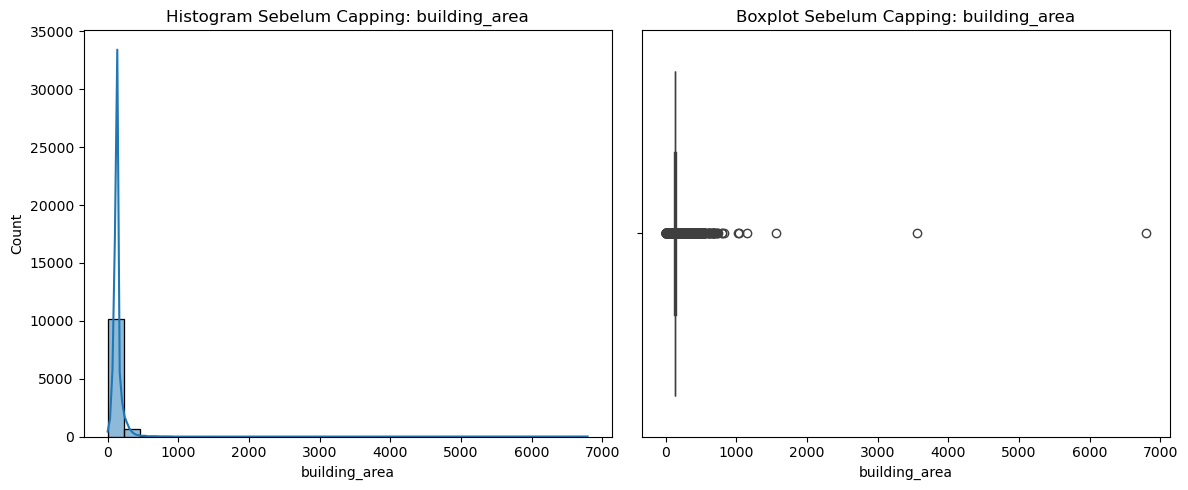

In [127]:
# Menampilkan boxplot sebelum capping

def plot_before(original, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Membuat Boxplot
    sns.histplot(original[column], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram Sebelum Capping: {column}")

    # Membuat Histogram
    sns.boxplot(x=original[column], ax=axes[1])
    axes[1].set_title(f"Boxplot Sebelum Capping: {column}")

    # Menampilkan grafik
    plt.tight_layout()
    plt.show()

plot_before(X_train, 'building_area')

Kemudian kita akan lakukan capping.

In [128]:
# Membuat fungsi untuk Winsorization
def apply_winsorization_skew(train, variables, capping_method='iqr', tail='both', fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriser.fit_transform(train)
    return train_capped

# Mendefinisikan kolom extreme skewed
extreme_skewed_columns = ['building_area']

# Memastikan Winsorizer untuk menangani outlier pada kolom building_area
X_train_capped = apply_winsorization_skew(X_train, extreme_skewed_columns, fold=3)

# Menghitung persentase outlier setelah handling outlier
calculate_outlier_percentages_skew(X_train_capped, ['building_area'], 3)

Persentase outlier pada kolom building_area: 0.00%


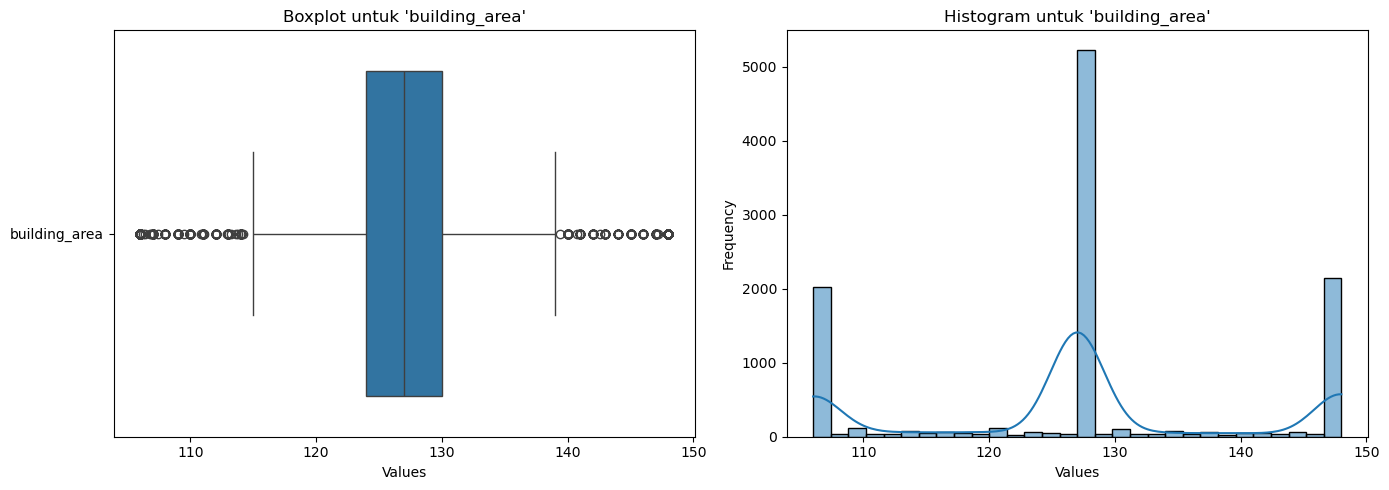

In [129]:
# Membuat variable kolom yang terdeteksi sebagai extreme skewed
extreme_skewed_columns = ['building_area']

# Membuat pengaturan grafik
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Membuat Boxplot
sns.boxplot(data=X_train_capped[['building_area']], orient="h", ax=axes[0])
axes[0].set_title("Boxplot untuk 'building_area'")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("")

# Membuat Histogram
sns.histplot(data=X_train_capped['building_area'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram untuk 'building_area'")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Frequency")

# Menampilkan grafik
plt.tight_layout()
plt.show()

Dari boxplot tersebut, terlihat distribusi data outlier telah menjadi lebih stabil.

### 5.7. Penyesuaian Tipe Data

Kita akan menyesuaikan jenis tipe data berdasarkan value yang dimiliki oleh masing-masing kolom.

In [130]:
# Menyesuaikan kembali nama X_train
X_train = X_train_capped.copy()

# Merubah kolom tanggal menjadi datetime
X_train['date'] = pd.to_datetime(df['date'], dayfirst=True)
X_test['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Membuat variabel yang berisi kolom-kolom yang akan dirubah tipe datanya menjadi integer
cols_to_int = ['bedroom', 'bathroom', 'carport', 'year_built', 'property_count']

# Merubah kolom-kolom tertentu menjadi integer
for col in cols_to_int:
    X_train[col] = X_train[col].astype('Int64') 
    X_test[col] = X_test[col].astype('Int64')

# Menampilkan info data pada X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 7372 to 9473
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rooms           10864 non-null  int64         
 1   type            10864 non-null  object        
 2   method          10864 non-null  object        
 3   date            10864 non-null  datetime64[ns]
 4   distance        10864 non-null  float64       
 5   bedroom         10864 non-null  Int64         
 6   bathroom        10864 non-null  Int64         
 7   carport         10864 non-null  Int64         
 8   land_size       10864 non-null  float64       
 9   building_area   10864 non-null  float64       
 10  year_built      10864 non-null  Int64         
 11  region_name     10864 non-null  object        
 12  property_count  10864 non-null  Int64         
 13  suburb_freq     10864 non-null  int64         
dtypes: Int64(5), datetime64[ns](1), float64(3), int64(2), obj

In [131]:
# Menampilkan informasi data pada X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716 entries, 283 to 2766
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rooms           2716 non-null   int64         
 1   type            2716 non-null   object        
 2   method          2716 non-null   object        
 3   date            2716 non-null   datetime64[ns]
 4   distance        2716 non-null   float64       
 5   bedroom         2716 non-null   Int64         
 6   bathroom        2716 non-null   Int64         
 7   carport         2716 non-null   Int64         
 8   land_size       2716 non-null   float64       
 9   building_area   2716 non-null   float64       
 10  year_built      2716 non-null   Int64         
 11  region_name     2716 non-null   object        
 12  property_count  2716 non-null   Int64         
 13  suburb_freq     2716 non-null   int64         
dtypes: Int64(5), datetime64[ns](1), float64(3), int64(2), objec

Seluruh data pada train dan test sudah disesuaikan tipenya.

### 5.8. Feature Selection

Selanjutnya kita akan melakukan feature selection.

In [132]:
# Concatenate X_train dan y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# Menampilkan data pada X_train
concat_train.head()

,rooms,type,method,date,distance,bedroom,bathroom,carport,land_size,building_area,year_built,region_name,property_count,suburb_freq,price
7372,2,u,S,2016-09-24,2.5,2,1,1,0.0,127.0,2007,Northern Metropolitan,1123,25,565000.0
7793,3,h,S,2017-04-29,13.9,3,2,2,820.0,127.0,1970,Eastern Metropolitan,9028,116,1700000.0
5534,2,u,SP,2016-06-04,2.1,2,2,1,0.0,127.0,2001,Southern Metropolitan,5943,85,575000.0
8069,3,h,S,2017-05-13,11.2,3,2,2,711.0,148.0,1915,Southern Metropolitan,8801,117,2020000.0
5008,4,h,PI,2016-11-27,8.8,4,1,3,577.0,127.0,1970,Northern Metropolitan,14577,239,910000.0


In [133]:
# Melihat kolom pada data concat_train
concat_train.columns

Index(['rooms', 'type', 'method', 'date', 'distance', 'bedroom', 'bathroom',
       'carport', 'land_size', 'building_area', 'year_built', 'region_name',
       'property_count', 'suburb_freq', 'price'],
      dtype='object')

Lalu kita melihat korelasi antar fitur dengan target.

In [134]:
# Membuat fungsi menghitung korelasi antar variabel
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[all_columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Mendefinisikan list kolom dan target
columns = ['rooms', 'type', 'method', 'date', 'distance', 'bedroom', 'bathroom',
       'carport', 'land_size', 'building_area', 'year_built', 'region_name',
       'property_count', 'suburb_freq']
target = 'price'

all_columns = columns + [target]

# Menghitung Phi-K correlation untuk setiap kolom
correlation = compute_phik_correlation(concat_train, all_columns, target)

# Menampilkan hasil
print(correlation)

interval columns not set, guessing: ['rooms', 'distance', 'bedroom', 'bathroom', 'carport', 'land_size', 'building_area', 'year_built', 'property_count', 'suburb_freq', 'price']
rooms             0.385101
type              0.435943
method            0.148517
date              0.144611
distance          0.195963
bedroom           0.345192
bathroom          0.510100
carport           0.312805
land_size         0.000000
building_area     0.381070
year_built        0.272885
region_name       0.294943
property_count    0.222723
suburb_freq       0.184823
price             1.000000
Name: price, dtype: float64


Berdasarkan hasil phi k, kita akan mendrop kolom `land_size` karena tidak memiliki korelasi sama sekali dengan target, yaitu `price`.

In [135]:
# Menyisihkan kolom land_size
X_train_updated = X_train.drop(columns=['land_size'])
X_test_updated = X_test.drop(columns=['land_size'])

# Menampilkan kolom
print(X_train_updated .columns)
print(X_test_updated.columns)

Index(['rooms', 'type', 'method', 'date', 'distance', 'bedroom', 'bathroom',
       'carport', 'building_area', 'year_built', 'region_name',
       'property_count', 'suburb_freq'],
      dtype='object')
Index(['rooms', 'type', 'method', 'date', 'distance', 'bedroom', 'bathroom',
       'carport', 'building_area', 'year_built', 'region_name',
       'property_count', 'suburb_freq'],
      dtype='object')


In [136]:
# Menampilkan tipe data
X_train_updated.dtypes

rooms                      int64
type                      object
method                    object
date              datetime64[ns]
distance                 float64
bedroom                    Int64
bathroom                   Int64
carport                    Int64
building_area            float64
year_built                 Int64
region_name               object
property_count             Int64
suburb_freq                int64
dtype: object

In [137]:
# Penyesuaian nama
X_train = X_train_updated.copy()
X_test = X_test_updated.copy()

### 5.9. Pemisahan Kolom Numerikal dan Kategorikal 

Setelah dilakukan feature selection, kita akan melakukan pemisahan Kolom Numerikal dan Kolom Kategorikal sebelum dilakukan feature scaling dan encoding.

In [138]:
# Mengelompokkan kolom numerikal dan kategorikal
num_cols = ['rooms', 'distance', 'bedroom', 'bathroom', 'carport', 'building_area', 'year_built', 'property_count', 'suburb_freq']
cat_cols = ['type', 'method', 'region_name']
print(f'Numerical columns:\n{num_cols}')
print(f'Categorical columns:\n{cat_cols}')

Numerical columns:
['rooms', 'distance', 'bedroom', 'bathroom', 'carport', 'building_area', 'year_built', 'property_count', 'suburb_freq']
Categorical columns:
['type', 'method', 'region_name']


### 5.10. Feature Scaling and Encoding

Pada bagian ini, kita akan melakukan feature scaling dan encoding sebelum melakukan training models.

In [139]:
# Pipeline untuk fitur numerik
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorik
categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# Menerapkan scaling pada data pelatihan
X_train_scaled = preprocessor.fit_transform(X_train)

# Menggunakan transform untuk data pengujian
X_test_scaled = preprocessor.transform(X_test)

print('Train Size: ', X_train_scaled.shape)
print('Test Size: ', X_test_scaled.shape)

Train Size:  (10864, 25)
Test Size:  (2716, 25)


# 6. Model Definition

Pada bagian ini, kita akan membuat definisi model yang akan digunakan.

### 6.1 K-Nearest Neighbors (KNN) 

In [140]:
# Membuat pipeline KNN
knn_pipe = Pipeline([('preprocessor', preprocessor), ('knn', KNeighborsRegressor())])

### 6.2 Support Vector Machine (SVM) 

In [141]:
# Membuat pipeline SVM
svm_pipe = Pipeline([('preprocessor', preprocessor), ('svm', SVR())])

### 6.3 Decision Tree

In [142]:
# Membuat pipeline Decision Tree
dt_pipe = Pipeline([('preprocessor', preprocessor),('dt', DecisionTreeRegressor(random_state=28))])

### 6.4 Random Forest

In [143]:
# Membuat pipeline Random Forest
rf_pipe = Pipeline([('preprocessor', preprocessor),('rf', RandomForestRegressor(random_state=28))])

### 6.5 Gradient Boosting

In [144]:
# Membuat pipeline GB (Gradient Boosting)
gb_pipe = Pipeline([('preprocessor', preprocessor),('gb', GradientBoostingRegressor())])

# 7. Model Training

Paga bagian ini, kita akan melakukan training model sesuai pipeline yang telah kita siapkan pada bagian sebelumnya.

### 7.1. Cross Validation Score - Before Tuning

In [145]:
# Membuat variable yang berisi list model yang akan digunakan
models = {
    'knn_model': knn_pipe,
    'svm_model': svm_pipe,
    'dt_model': dt_pipe,
    'rf_model': rf_pipe,
    'gb_model': gb_pipe
}

# Membuat variabel kfold
kf = KFold(n_splits=5, shuffle=True, random_state=28)

# Pemakaian metrik r2, neg_mean_absolute_error, dan neg_root_mean_squared_error
best_model_name = None
best_r2 = -float('inf')

for name, model in models.items():
    print(f"Evaluating {name} ...")
    
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    rmse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    
    print(f"R2 Scores: {r2_scores}")
    print(f"Mean R2: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print(f"Mean MAE: {-mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Mean RMSE: {-rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print("-" * 50)
    
    # Menentukan model terbaik berdasarkan mean R2 terbesar
    if r2_scores.mean() > best_r2:
        best_r2 = r2_scores.mean()
        best_model_name = name

# Menampilkan model terbaik
print(f"Best model based on mean R2: {best_model_name} with R2 = {best_r2:.4f}")

Evaluating knn_model ...
R2 Scores: [0.62604871 0.65461232 0.60468287 0.63755213 0.60374869]
Mean R2: 0.6253 ± 0.0195
Mean MAE: 241360.8584 ± 5372.6878
Mean RMSE: 394066.0134 ± 10179.2063
--------------------------------------------------
Evaluating svm_model ...
R2 Scores: [-0.05716824 -0.08346948 -0.07760346 -0.07992709 -0.0658636 ]
Mean R2: -0.0728 ± 0.0098
Mean MAE: 442604.3733 ± 7319.3531
Mean RMSE: 667156.9684 ± 12969.2054
--------------------------------------------------
Evaluating dt_model ...
R2 Scores: [0.52332937 0.52981994 0.51961239 0.48469308 0.53432451]
Mean R2: 0.5184 ± 0.0176
Mean MAE: 264980.7005 ± 6605.8995
Mean RMSE: 447031.7931 ± 14479.3402
--------------------------------------------------
Evaluating rf_model ...
R2 Scores: [0.73397264 0.72705718 0.70850603 0.71847207 0.70057292]
Mean R2: 0.7177 ± 0.0121
Mean MAE: 206002.7483 ± 4296.3275
Mean RMSE: 342163.2221 ± 10180.6437
--------------------------------------------------
Evaluating gb_model ...
R2 Scores: [0.73

Dari hasil training awal tanpa tuning, informasi yang kita peroleh adalah:
1. Model Random Forest (`rf_model`) merupakan model baseline terbaik dengan R2 terbaik dan MAE dan RMSE terendah. Hal ini akan membuat prediksi lebih akurat dan error yang dihasilkan lebih sedikit kemungkinannya.
2. SVMatau (`svm_model`) memiliki nilai yang rendah, sehingga tidak cocok untuk digunakan pada data ini.
3. Model lain seperti KNN (`knn_model`), Decision Tree (`dt_model`), dan Gradient Boosting (`gb_model`) memiliki nilai cukup baik namun tidak melampaui performa dari Random Forest.

Setelah melakukan training baseline model, kita akan mencoba meningkatkan performa model dengan hyperparameter tuning.

### 7.2. Hyperparameter Tuning

Pada bagian ini, kita akan melakukan tuning terhadap hasil training pada tahap sebelumnya.

##### 7.2.1 Hyperparameter Tuning - Grid Search

In [146]:
# Membuat parameter tuning dengan GridSearchCV
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    rf_pipe,               
    param_grid=param_grid_rf,
    scoring='r2',       
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Menampilkan 0utput hasil terbaik
print('Best hyperparameters (GridSearchCV):', grid_search_rf.best_params_)
print('Best R2 score (GridSearchCV):', grid_search_rf.best_score_)

# Menyimpan model terbaik
best_rf_model_grid = grid_search_rf.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters (GridSearchCV): {'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Best R2 score (GridSearchCV): 0.7302612515634235


##### 7.2.2 Hyperparameter Tuning - Random Search

In [147]:
# Membuat parameter tuning dengan RandomizedSearchCV
param_dist_rf = {
    'rf__n_estimators': [100, 200, 300, 400, 500],
    'rf__max_depth': [None, 10, 20, 30, 40],
    'rf__min_samples_split': [2, 5, 10, 15],
    'rf__min_samples_leaf': [1, 2, 4, 6]
}

random_search_rf = RandomizedSearchCV(
    rf_pipe,              
    param_distributions=param_dist_rf,
    n_iter=20,             
    scoring='r2',          
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Menampilkan output hasil terbaik
print('Best hyperparameters (RandomizedSearchCV):', random_search_rf.best_params_)
print('Best R2 score (RandomizedSearchCV):', random_search_rf.best_score_)

# Menyimpan model terbaik
best_rf_model_random = random_search_rf.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters (RandomizedSearchCV): {'rf__n_estimators': 500, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_depth': 20}
Best R2 score (RandomizedSearchCV): 0.7306413516261594


Setelah dilakukan dua jenis hyperparameter tuning, hasil R2 score dari Random Forest sebagai model terbaik memiliki nilai yang hampir sama, yaitu sekitar 0.73. Pada perbandingan hasil setelah tuning dengan Cross Validation, kita akan mengambil hasil dari tuning dengan Grid Search.

### 7.3. Cross Validation - After Tuning

In [148]:
# Hasil Cross validation sebelum tuning
r2_before = 0.7128
mae_before = 207599
rmse_before = 344882

# Hasil Cross validation setelah tuning dengan grid search:
best_model = best_rf_model_grid  

kf = KFold(n_splits=5, shuffle=True, random_state=28)

r2_scores_after = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
mae_scores_after = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_after = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

r2_mean_after = r2_scores_after.mean()
r2_std_after = r2_scores_after.std()
mae_mean_after = -mae_scores_after.mean()
mae_std_after = mae_scores_after.std()
rmse_mean_after = -rmse_scores_after.mean()
rmse_std_after = rmse_scores_after.std()

# --- Membuat tabel perbandingan ---

comparison_df = pd.DataFrame({
    'Metric': ['R2 Mean', 'MAE Mean', 'RMSE Mean'],
    'Before Tuning': [r2_before, mae_before, rmse_before],
    'After Tuning (mean ± std)': [
        f"{r2_mean_after:.4f} ± {r2_std_after:.4f}",
        f"{mae_mean_after:.2f} ± {mae_std_after:.2f}",
        f"{rmse_mean_after:.2f} ± {rmse_std_after:.2f}"
    ]
})

print(comparison_df)

      Metric  Before Tuning After Tuning (mean ± std)
0    R2 Mean         0.7128           0.7335 ± 0.0136
1   MAE Mean    207599.0000       199973.41 ± 3726.90
2  RMSE Mean    344882.0000      332470.89 ± 11735.03


Setelah dilakukan training sebelum dan sesudah training, informasi yang kita dapat adalah:
1. Nilai R2 mean meningkat sekitar 0.02, sehingga setelah dilakukan tuning, model akan membuat prediksi yang lebih akurat dari sebelumnya.
2. Nilai MAE menurun sekitar 8000, sehingga setelah dilakukan tuning, model akan membuat prediksi lebih mendekati ke nilai asli.
3. Nilai RMSE menurun sekitar 12000, sehingga setelah dilakuakn tuning, model akan membuat prediksi dengan lebih konsisten dan lebih sedikit error.

Setelah melakukan model training, kita akan melakukan evaluasi terhadap penggunaan model-model tersebut.

# 8. Model Evaluation

Kita akan mengevaluasi penggunaan model yang telah dilakukan pada bagian Model Training sebelumnya.

In [149]:
# Predict Train and Test sets
y_pred_train = best_rf_model_random.predict(X_train)
y_pred_test = best_rf_model_random.predict(X_test)

# Evaluation metrics
print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test))
print()

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test))
print()

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))
print()

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))
print()

MAE - Train Set  :  145663.49736334325
MAE - Test Set   :  196596.81738884695

MSE - Train Set  :  62194973543.75093
MSE - Test Set   :  105971262127.78065

RMSE - Train Set :  249389.20093650994
RMSE - Test Set  :  325532.27509385406

R2 Score - Train Set :  0.850168713023471
R2 Score - Test Set  :  0.7229584354262217



Dari hasil evaluasi di atas, informasi yang dapat kita peroleh adalah:
1. Selisih nilai MAE antara data Train dan Test tidak terlalu besar, sehingga dapat dikatakan bahwa model tidak overfit meskipun nilai error meningkat pada test set.
2. Nilai RMSE pada data test lebih besar. Hal ini menunjukkan bahwa performa model menurun di data baru walaupun performanya masih dapat dianggap stabil.
3. Melalui nilai R2 yang berada di atas 0.70, dapat diasumsikan bahwa model memiliki performa yang cukup baik.

# 9. Model Saving



In [150]:
# Menyimpan Model
import json
joblib.dump(best_rf_model_random, "best_model_rf.pkl")

features = X_train.columns.tolist()
with open("features_rf.json", "w") as f:
    json.dump(features, f)

# 10. Kesimpulan dan Rekomendasi

### 10.1. Kesimpulan 

Berdasarkan hasil analisis dan pembuatan machine learning ini, kesimpulan yang didapat adalah:
1. Model Random Forest lebih akurat dan dapat melakukan generalisasi secara lebih baik. Dengan menggabungkan prediksi dari banyak pohon, Random Forest cenderung memiliki performa lebih baik dan mengurangi risiko overfitting. Selain itu, Random Forest kurang terpengaruh oleh perubahan kecil dalam data. Algoritma ini lebih efisien untuk dataset berjumlah besar. 

2. Performa Model Setelah Tuning:
        R² Score (Test Set) : meningkat dari sekitar 0.713 menjadi 0.733, menandakan bahwa terjadi peningkatan kemampuan model dalam melakukan prediksi variasi harga rumah.
        MAE (Test Set)      : menurun dari 207599  menjadi 199973, menandakan bahwa rata-rata kesalahan prediksi harga menurun.
        RMSE (Test Set)     : menurun dari 344882 menjadi 332471, menandakan penurunan deviasi prediksi dari nilai aktual.

3. Tidak terjadi overfit walau terdapat perbedaan performa dari data Train dan Test. 

### 10.2. Rekomendasi dan Insight Bisnis

Rekomendasi serta insight bisnis yang dapat diambil dari hasil analisis project ini adalah:

1. Seluruh user seperti masyarakat, agen, developer, investor, dan lain-lain dapat menghitung harga rumah / bangunan lainnya dengan lebih baik.
2. Berdasarkan dataset yang dianalisis, variabel paling berpengaruh antara lain tipe properti, luas bangunan, serta jumlah ruangan (baik kamar maupun kamar mandi). Developer, investor, atau masyarakat umumm dapat memperhatikan ketiga variable ini untuk melakukan jual beli properti.
3. User dapat menggunakan model ini untuk dapat menghitung harga wajar dari sebuah properti. Namun, perhitungan terbaik tetap harus dilakukan melalui tim independen yang bekerja secara profesional untuk melakukan valuasi properti.
